In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import datetime 

%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

sns.set(rc={'figure.figsize':(15,10)})

# Challenge 1

In [2]:
data = json.load((open('logins.json')))
df = pd.DataFrame(data)
df.head()

login_time
0  1970-01-01 20:13:18
1  1970-01-01 20:16:10
2  1970-01-01 20:16:37
3  1970-01-01 20:16:36
4  1970-01-01 20:26:21

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null object
dtypes: object(1)
memory usage: 727.8+ KB


We will convert login_time object into datetime.

In [4]:
df['login_time'] = df['login_time'].astype('datetime64[ns]')

Round it into 15 min intervals.

In [5]:
df['login_round_time'] = df['login_time'].dt.round('15min')
df.head()

login_time    login_round_time
0 1970-01-01 20:13:18 1970-01-01 20:15:00
1 1970-01-01 20:16:10 1970-01-01 20:15:00
2 1970-01-01 20:16:37 1970-01-01 20:15:00
3 1970-01-01 20:16:36 1970-01-01 20:15:00
4 1970-01-01 20:26:21 1970-01-01 20:30:00

Similarly round it to Hours, Day, Month.

In [6]:
df['login_hour_time'] = df['login_time'].dt.round('H')
df['login_day_time'] = df['login_time'].dt.round('D')
df['login_month'] = df['login_time'].dt.month
df['login_hour'] = df['login_time'].dt.hour
df['login_day'] = df['login_time'].dt.weekday_name
df.tail()

login_time    login_round_time     login_hour_time  \
93137 1970-04-13 18:50:19 1970-04-13 18:45:00 1970-04-13 19:00:00   
93138 1970-04-13 18:43:56 1970-04-13 18:45:00 1970-04-13 19:00:00   
93139 1970-04-13 18:54:02 1970-04-13 19:00:00 1970-04-13 19:00:00   
93140 1970-04-13 18:57:38 1970-04-13 19:00:00 1970-04-13 19:00:00   
93141 1970-04-13 18:54:23 1970-04-13 19:00:00 1970-04-13 19:00:00   

      login_day_time  login_month  login_hour login_day  
93137     1970-04-14            4          18    Monday  
93138     1970-04-14            4          18    Monday  
93139     1970-04-14            4          18    Monday  
93140     1970-04-14            4          18    Monday  
93141     1970-04-14            4          18    Monday

In [7]:
df.describe(include='all')

login_time     login_round_time      login_hour_time  \
count                 93142                93142                93142   
unique                92265                 9376                 2448   
top     1970-02-12 11:16:53  1970-03-01 04:45:00  1970-04-04 05:00:00   
freq                      3                   67                  222   
first   1970-01-01 20:12:16  1970-01-01 20:15:00  1970-01-01 20:00:00   
last    1970-04-13 18:57:38  1970-04-13 19:00:00  1970-04-13 19:00:00   
mean                    NaN                  NaN                  NaN   
std                     NaN                  NaN                  NaN   
min                     NaN                  NaN                  NaN   
25%                     NaN                  NaN                  NaN   
50%                     NaN                  NaN                  NaN   
75%                     NaN                  NaN                  NaN   
max                     NaN                  NaN                  NaN   

             login_day_time   login_month    login_hour login_day  
count                 93142  93142.000000  93142.000000     93142  
unique                  103           NaN           NaN         7  
top     1970-04-04 00:00:00           NaN           NaN  Saturday  
freq                   2394           NaN           NaN     19377  
first   1970-01-02 00:00:00           NaN           NaN       NaN  
last    1970-04-14 00:00:00           NaN           NaN       NaN  
mean                    NaN      2.424062     11.635363       NaN  
std                     NaN      0.995154      7.816792       NaN  
min                     NaN      1.000000      0.000000       NaN  
25%                     NaN      2.000000      4.000000       NaN  
50%                     NaN      3.000000     12.000000       NaN  
75%                     NaN      3.000000     19.000000       NaN  
max                     NaN      4.000000     23.000000       NaN

Above description shows logins based on time, round_time, hour_time, day_time, month, hour, day.

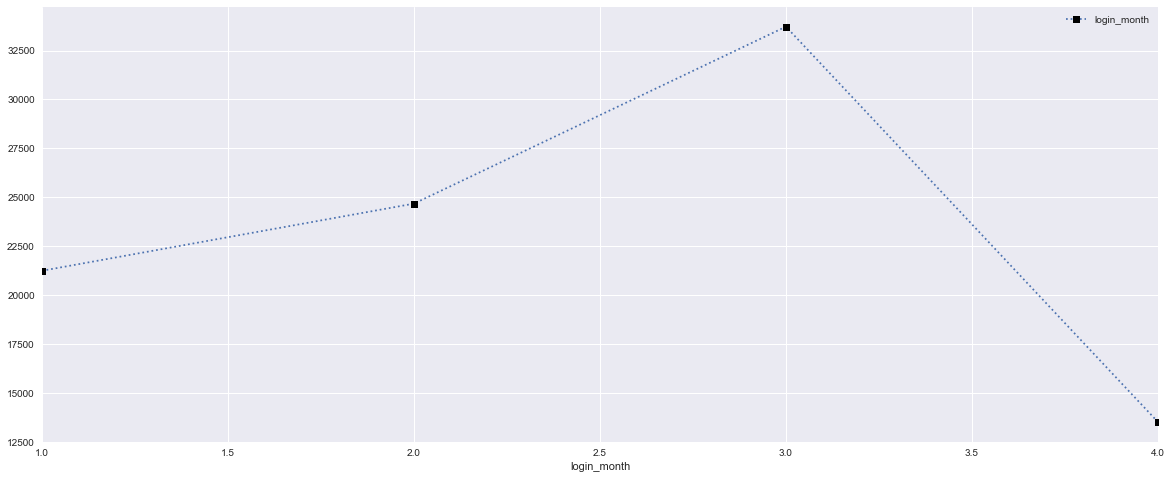

In [8]:
df.groupby(['login_month'])['login_month'].agg('count').plot(style='s:', markerfacecolor='black', figsize=(20,8))
plt.legend()
plt.show()

Month 3 had a lot of demand.

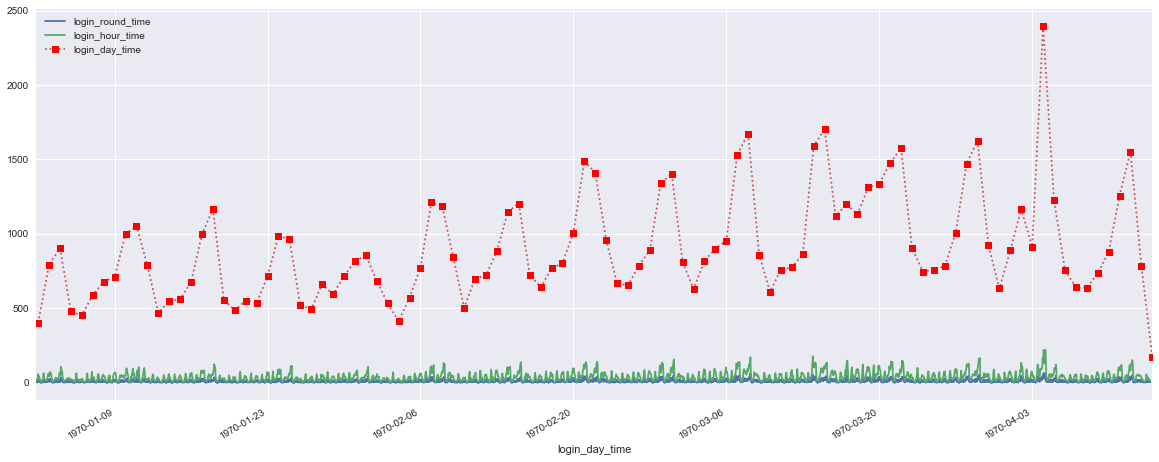

In [9]:
df.groupby(['login_round_time'])['login_round_time'].agg('count').plot(figsize=(20,8))
df.groupby(['login_hour_time'])['login_hour_time'].agg('count').plot()
df.groupby(['login_day_time'])['login_day_time'].agg('count').plot(style='s:', markerfacecolor='red') 
plt.legend()
plt.show()

1970-01-01 is a Thursday and by looking at the red plots there are upward spikes during Friday, Saturday and then it decreases. It looks like demand spikes during weekends.

Monday starts to have a downward trend, and demand goes down (i.e. demand goes down during weekdays).

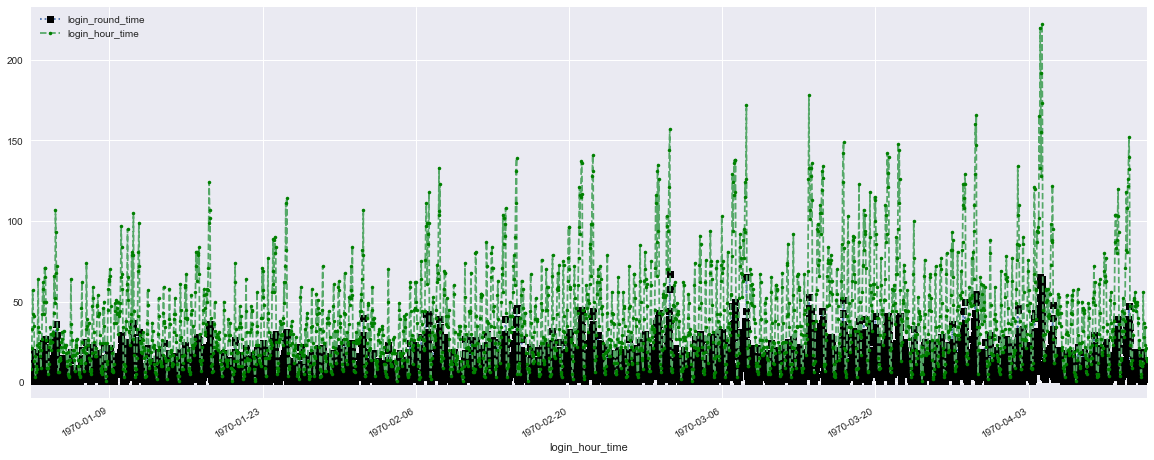

In [10]:
df.groupby(['login_round_time'])['login_round_time'].agg('count').plot(style='s:', markerfacecolor='black', figsize=(20,8))
df.groupby(['login_hour_time'])['login_hour_time'].agg('count').plot(style='.--', markerfacecolor='green')
plt.legend()
plt.show()

Similarly looking at the activity using login time, there are a lot of points, we will reduce it into components to see where the demand lie.

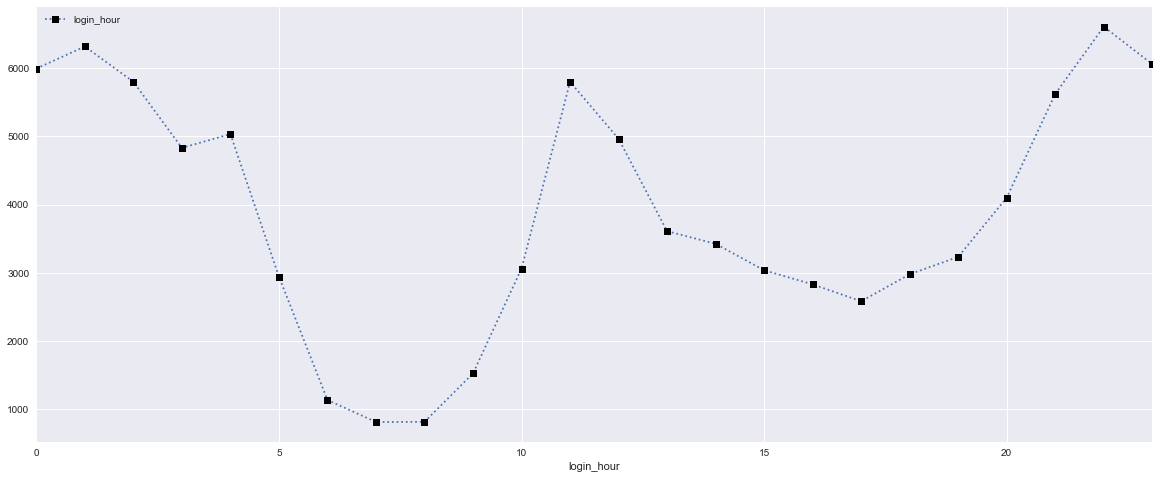

In [11]:
df.groupby(['login_hour'])['login_hour'].agg('count').plot(style='s:', markerfacecolor='black', figsize=(20,8))
plt.legend()
plt.show()

We see a low demand during morning hours and after noon hours, morning being low.

Demand spikes up during late night and early hours, and also around noon time.

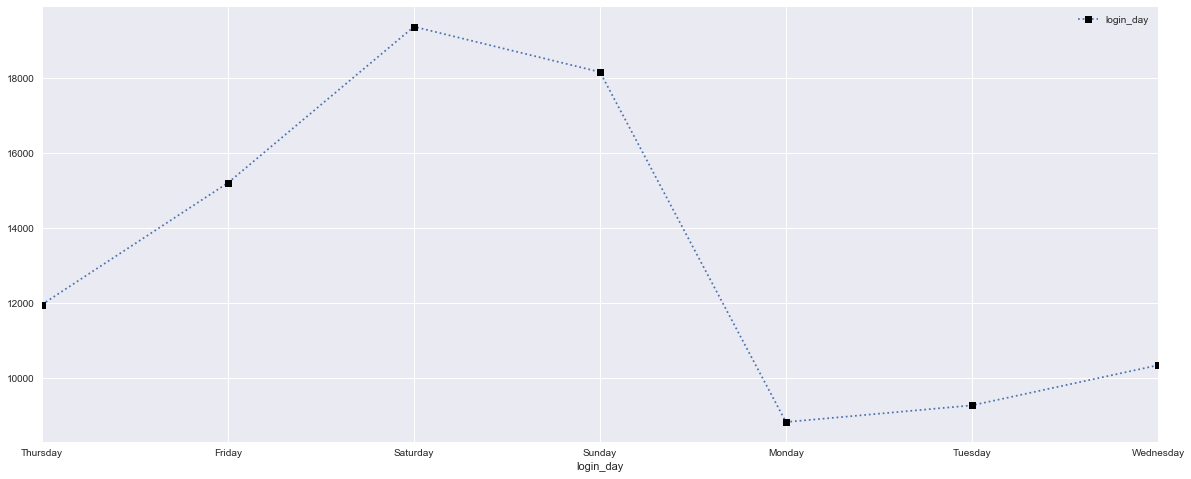

In [12]:
df.groupby(['login_day'], sort=False)['login_day'].agg('count').plot(style='s:', markerfacecolor='black', figsize=(20,8))
plt.legend()
plt.show()

As mentioned Saturday has the highest demand followed by Sunday.

And Monday, Tuesday, Wednesday have low demand.

From the above login time information we can say that there is lot of demand during Saturday and Sunday, the demand starts picking up on Friday and goes down on Monday.

# Challenge 2

Key measure of success would be <b>Surge in average traffic by 25%</b> between the cities.

I choose this metric because it's an indicator which shows people are moving between cities.

<b>Proposed experiment:</b> In order to increase activity between cities tolls should be removed during the weekend. 

The experiment will be conducted for 4 consecutive weekends and a sensor will be placed on both sides of the road counting the number of vehicles passing through the toll road. 

An indicator to measure the experiement is by counting the number of vehicles moving across the cities during the weekend.

If the vehicle count increases by 25% when tolls are removed during the weekend we can consider it to be a successful experiment.

Thus, stating if vehicle count is increased by 25% meaning there is a Surge in average traffic by 25%.

<b>Null Hypothesis:</b> There wont be any increase in traffic if no tolls during weekend.

<b>Alternative Hypothesis:</b> There will be a increase in traffic if no tolls during weeked.

I would choose (one-sample) t-test. It provides p-value, stats for the experiment.

For the statistic for be significant we observe p-value, if p-value is less tha 0.05 (5%) we reject the null hypothesis.
And also looking into confidence intervals.

If p-value is significant, the experiment is successful.

After test, if there is a significance difference in increased traffic we reject the Null Hypothesis and take the alternative hypothesis.

For the experiment to be successful, the cities needs to make sure that there would be no tolls during the weekends and make sure it also applies for outside city vehicles too.

And when the weekend is over, the tolls are to be applied at sharp mid-night. 

# Challenge 3

In [13]:
data = json.load((open('ultimate_data_challenge.json')))
norm_data = json_normalize(data)
df = pd.DataFrame(norm_data)
df.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  
0                       4                 True         46.2  
1                       0                False         50.0  
2                       3                False        100.0  
3                       9                 True         80.0  
4                      14                False         82.4

In [14]:
df.describe()

avg_dist  avg_rating_by_driver  avg_rating_of_driver     avg_surge  \
count  50000.000000          49799.000000          41878.000000  50000.000000   
mean       5.796827              4.778158              4.601559      1.074764   
std        5.707357              0.446652              0.617338      0.222336   
min        0.000000              1.000000              1.000000      1.000000   
25%        2.420000              4.700000              4.300000      1.000000   
50%        3.880000              5.000000              4.900000      1.000000   
75%        6.940000              5.000000              5.000000      1.050000   
max      160.960000              5.000000              5.000000      8.000000   

          surge_pct  trips_in_first_30_days   weekday_pct  
count  50000.000000            50000.000000  50000.000000  
mean       8.849536                2.278200     60.926084  
std       19.958811                3.792684     37.081503  
min        0.000000                0.000000      0.000000  
25%        0.000000                0.000000     33.300000  
50%        0.000000                1.000000     66.700000  
75%        8.600000                3.000000    100.000000  
max      100.000000              125.000000    100.000000

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Missing values, need some cleaning.

In [16]:
df.isnull().values.all()

False

In [17]:
df['last_trip_date'] = df['last_trip_date'].astype('datetime64[ns]')
df['signup_date'] = df['signup_date'].astype('datetime64[ns]')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [19]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna((df['avg_rating_by_driver'].mean()))
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna((df['avg_rating_of_driver'].mean()))

In [20]:
df.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  
0                       4                 True         46.2  
1                       0                False         50.0  
2                       3                False        100.0  
3                       9                 True         80.0  
4                      14                False         82.4

In [21]:
print(df.phone.unique())
print(df.city.unique())

['iPhone' 'Android' None]
["King's Landing" 'Astapor' 'Winterfell']


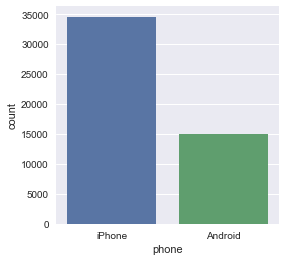

In [22]:
plt.figure(figsize=(4,4))
sns.countplot(df['phone'])
plt.show()

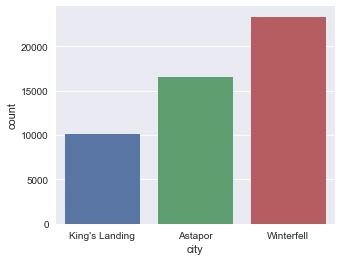

In [23]:
plt.figure(figsize=(5,4))
sns.countplot(df['city'])
plt.show()

In [24]:
df['phone'] = df['phone'].fillna('Android')

Since Android phones are less, filled out the None's with Android.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [26]:
df = df.sort_values('signup_date')

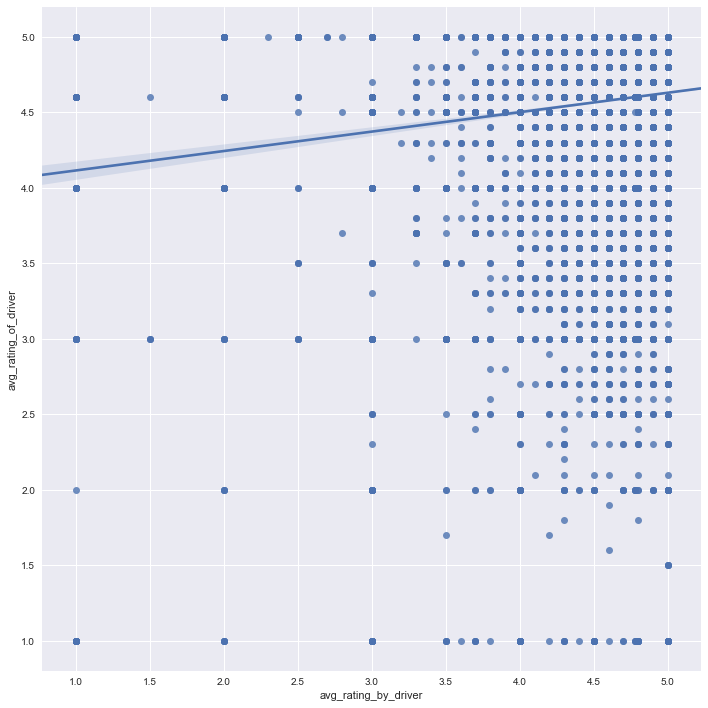

In [27]:
ax = sns.lmplot(data=df, x='avg_rating_by_driver', y='avg_rating_of_driver', size=10, aspect=1)
plt.legend()
plt.tight_layout()
plt.show()

We see as avg_rating_by_driver increases so does the avg_rating_of_driver.

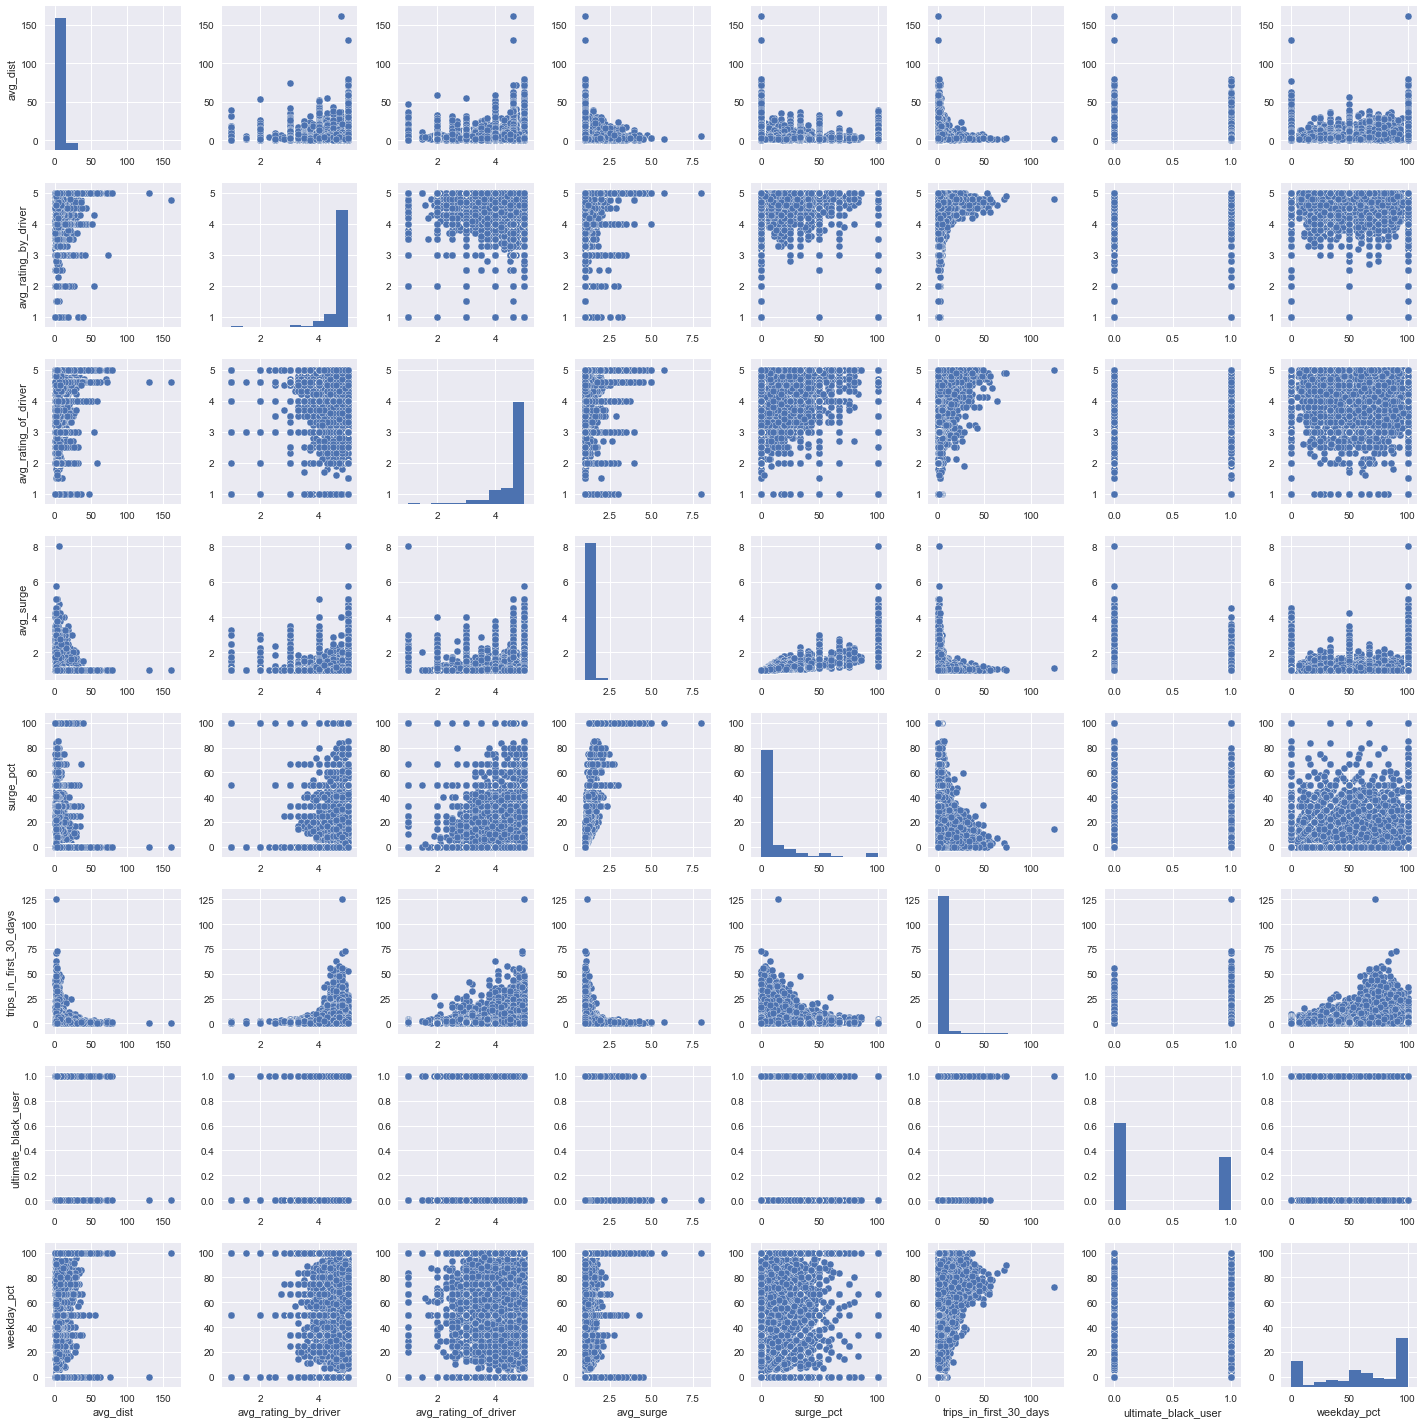

In [28]:
sns.pairplot(df)
plt.show()

We see some patterns here:

1. avg_dist increases avg_rating_by_driver, avg_rating_of_diver increase, but avg_surge, surge_pct, trips_in_first_30_days decreases
2. avg_surge increases surge_pct increases, and avg_dist, trips_in_first_30_days decreases.
3. surge_pct increases trips_in_first_30_days decreases
4. trips_in_first_30_days increases avg_rating_by_driver, avg_rating_of_diver, weekday_pct increases and avg_dist, avg_surge, surge_pct decreases.
5. Weekday_pct shows distribution w.r.t avg_dist, avg_surge (which has similar distribution).

In [29]:
grpByDates = df.groupby(['signup_date','last_trip_date']).mean()
grpByDates.head()

avg_dist  avg_rating_by_driver  \
signup_date last_trip_date                                   
2014-01-01  2014-01-01      6.271797              4.746094   
            2014-01-02      7.608627              4.815686   
            2014-01-03      4.528421              4.819903   
            2014-01-04      4.108462              4.692308   
            2014-01-05      4.264545              4.788923   

                            avg_rating_of_driver  avg_surge  surge_pct  \
signup_date last_trip_date                                               
2014-01-01  2014-01-01                  4.521788   1.242188  16.796875   
            2014-01-02                  4.697502   1.004510   1.045098   
            2014-01-03                  4.542187   1.000000   0.000000   
            2014-01-04                  4.708052   1.000000   0.000000   
            2014-01-05                  4.609658   1.083636  12.118182   

                            trips_in_first_30_days  ultimate_black_user  \
signup_date last_trip_date                                                
2014-01-01  2014-01-01                    1.062500             0.273438   
            2014-01-02                    1.284314             0.284314   
            2014-01-03                    2.578947             0.315789   
            2014-01-04                    2.923077             0.230769   
            2014-01-05                    2.454545             0.454545   

                            weekday_pct  
signup_date last_trip_date               
2014-01-01  2014-01-01       100.000000  
            2014-01-02       100.000000  
            2014-01-03       100.000000  
            2014-01-04        71.153846  
            2014-01-05        34.472727

Grouped By signup_date and last_trip_date to see some patterns.

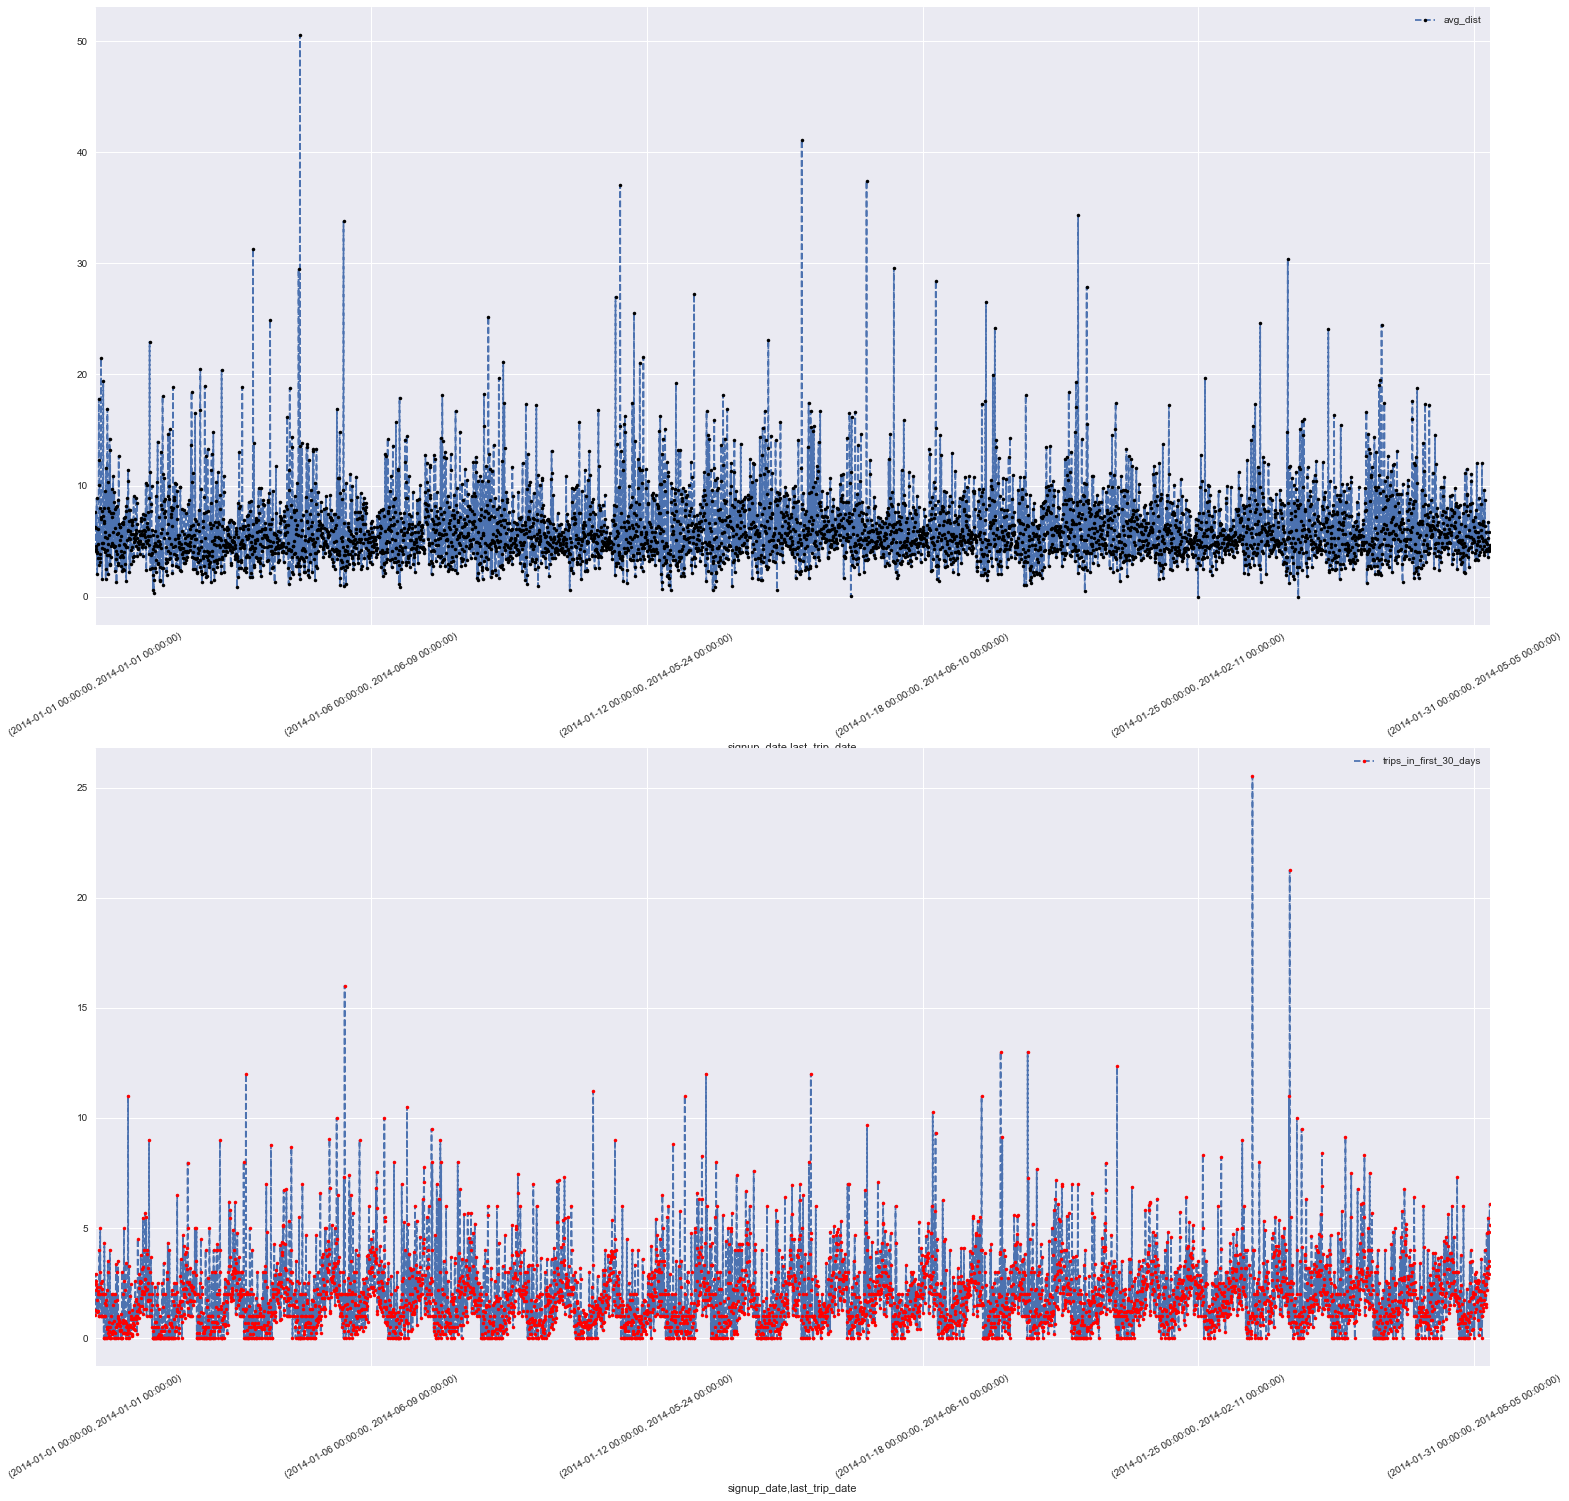

In [30]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(211)
grpByDates.avg_dist.plot(style='.--', markerfacecolor='black')
plt.xticks(rotation=30)
plt.legend()

ax = fig.add_subplot(212)
grpByDates.trips_in_first_30_days.plot(style='.--', markerfacecolor='red')
plt.xticks(rotation=30)
plt.legend()
plt.show()

From the first plot avg_dist increased after the signup_date, but decreased slowly.

trips_in_first_30_days are a bit constant after the signup_date but did increase after few months.

In [31]:
grpByDates.tail()

avg_dist  avg_rating_by_driver  \
signup_date last_trip_date                                   
2014-01-31  2014-06-27      4.378000              4.702857   
            2014-06-28      4.370167              4.761667   
            2014-06-29      4.110110              4.703297   
            2014-06-30      4.265932              4.744068   
            2014-07-01      4.671176              4.788235   

                            avg_rating_of_driver  avg_surge  surge_pct  \
signup_date last_trip_date                                               
2014-01-31  2014-06-27                  4.588661   1.065429   9.160000   
            2014-06-28                  4.646693   1.049167   5.946667   
            2014-06-29                  4.527558   1.115165  13.006593   
            2014-06-30                  4.532256   1.061525   8.538983   
            2014-07-01                  4.694118   1.119412  13.823529   

                            trips_in_first_30_days  ultimate_black_user  \
signup_date last_trip_date                                                
2014-01-31  2014-06-27                    2.914286             0.542857   
            2014-06-28                    4.800000             0.666667   
            2014-06-29                    3.252747             0.549451   
            2014-06-30                    6.084746             0.644068   
            2014-07-01                    5.117647             0.588235   

                            weekday_pct  
signup_date last_trip_date               
2014-01-31  2014-06-27        74.940000  
            2014-06-28        49.696667  
            2014-06-29        37.256044  
            2014-06-30        63.283051  
            2014-07-01        67.952941

Last_trip_date recorded was 2014-01-01

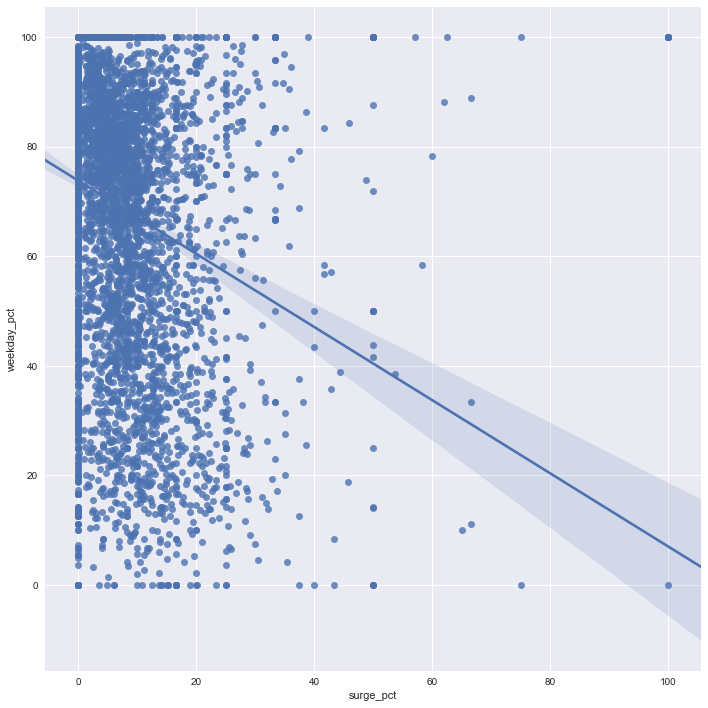

In [32]:
ax = sns.lmplot(data=grpByDates, x='surge_pct', y='weekday_pct', size=10, aspect=1)
plt.legend()
plt.tight_layout()
plt.show()

As weekday_pct increase surge_pct is decreasing.

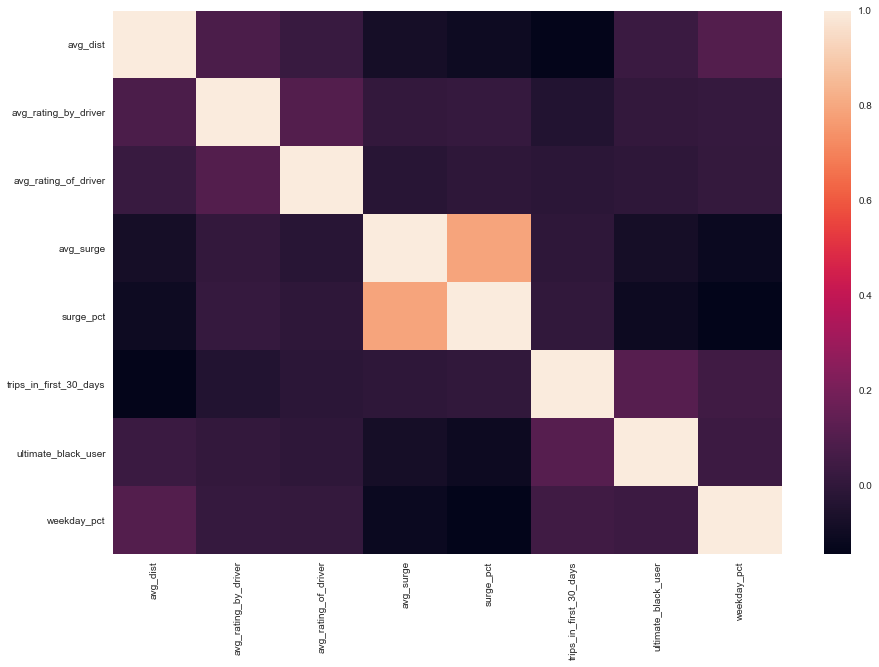

In [33]:
sns.heatmap(df.corr())
plt.show()

avg_surge, surge_pct only has high correlation and the remaining have low correlations.

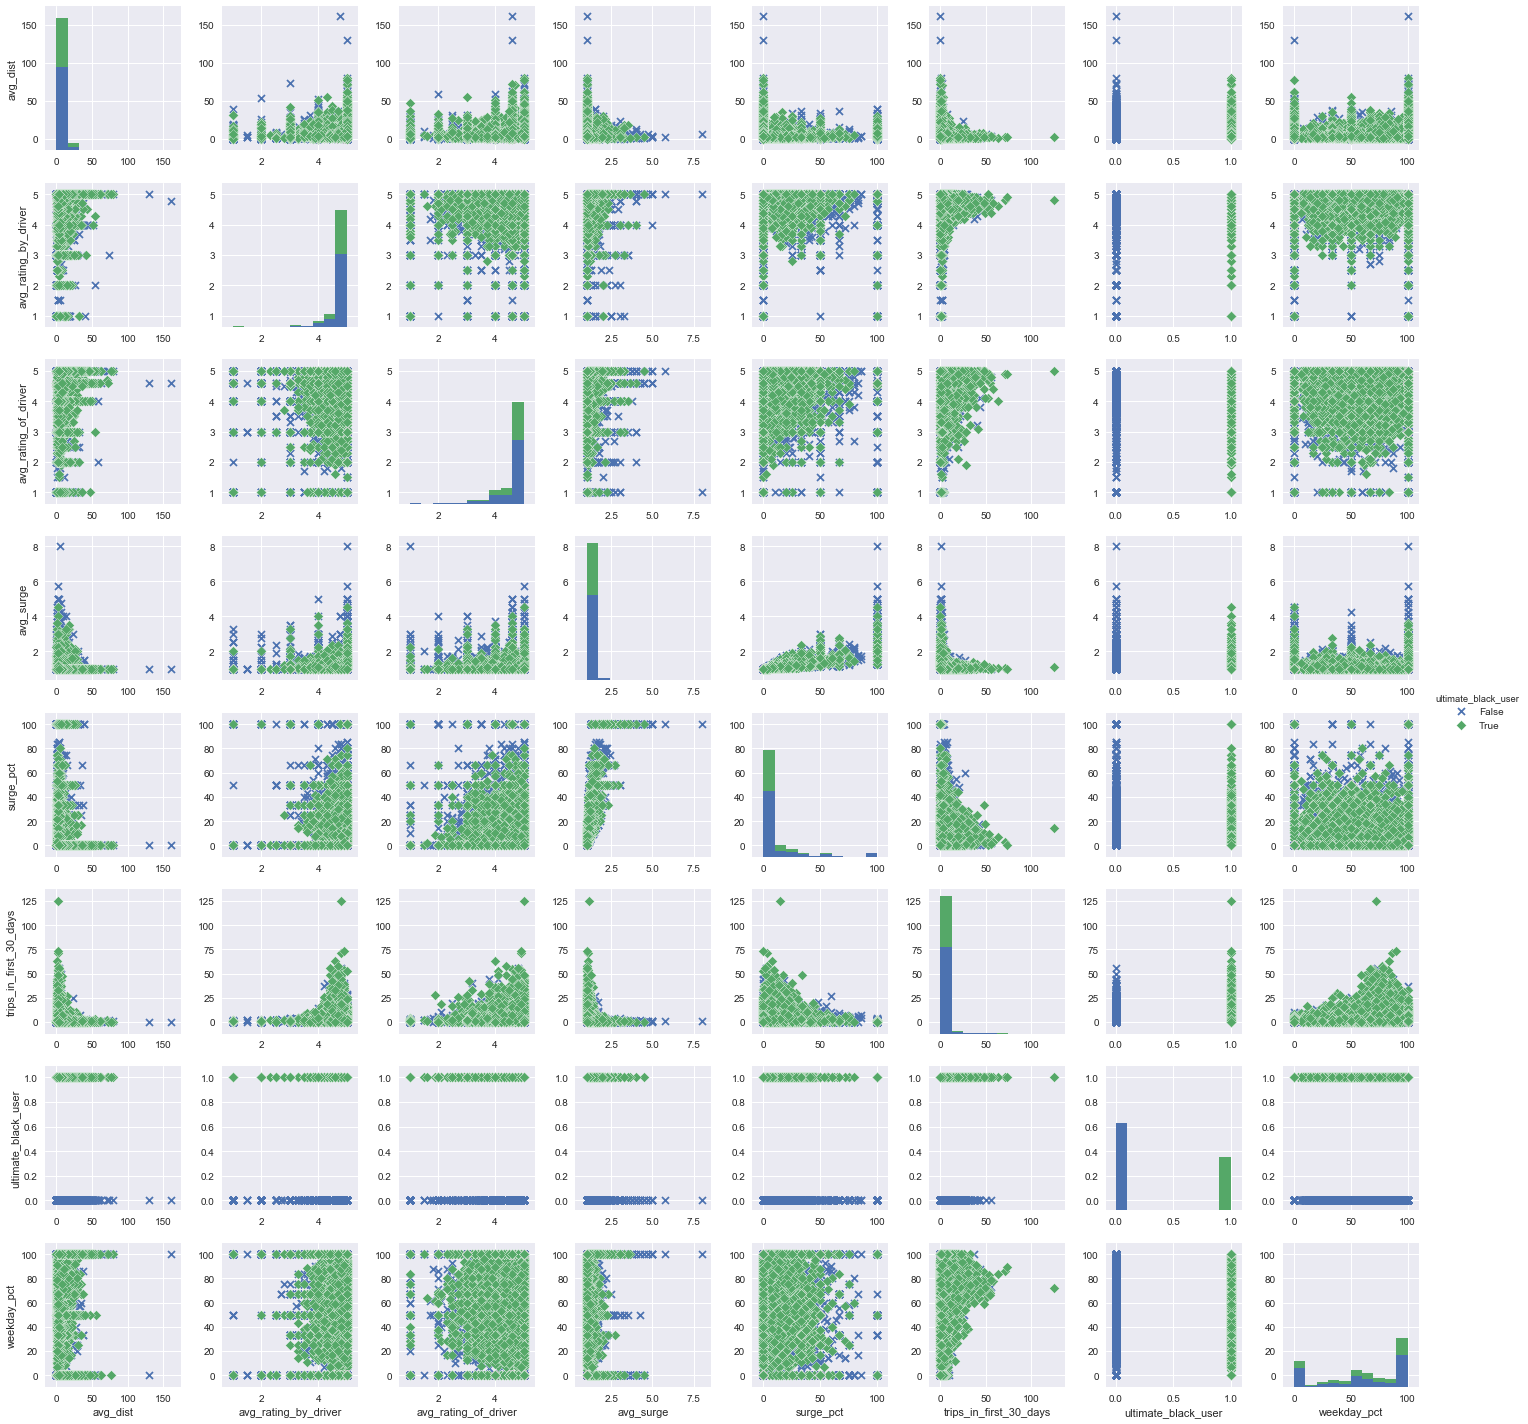

In [34]:
sns.pairplot(df, hue="ultimate_black_user",  markers=["x", "D"])
plt.show()

A pairplot using ultimate_black_user.

In [35]:
df['retention_150'] = (df['last_trip_date'] - df['signup_date']) > datetime.timedelta(days=150)

Let's feature engineer retention column.

True if the trip happens during the 6th month else false.

In [36]:
df.describe(include = 'all')

avg_dist  avg_rating_by_driver  avg_rating_of_driver  \
count   50000.000000          50000.000000          50000.000000   
unique           NaN                   NaN                   NaN   
top              NaN                   NaN                   NaN   
freq             NaN                   NaN                   NaN   
first            NaN                   NaN                   NaN   
last             NaN                   NaN                   NaN   
mean        5.796827              4.778158              4.601559   
std         5.707357              0.445753              0.564977   
min         0.000000              1.000000              1.000000   
25%         2.420000              4.700000              4.500000   
50%         3.880000              5.000000              4.700000   
75%         6.940000              5.000000              5.000000   
max       160.960000              5.000000              5.000000   

           avg_surge        city       last_trip_date   phone  \
count   50000.000000       50000                50000   50000   
unique           NaN           3                  182       2   
top              NaN  Winterfell  2014-06-29 00:00:00  iPhone   
freq             NaN       23336                 2036   34582   
first            NaN         NaN  2014-01-01 00:00:00     NaN   
last             NaN         NaN  2014-07-01 00:00:00     NaN   
mean        1.074764         NaN                  NaN     NaN   
std         0.222336         NaN                  NaN     NaN   
min         1.000000         NaN                  NaN     NaN   
25%         1.000000         NaN                  NaN     NaN   
50%         1.000000         NaN                  NaN     NaN   
75%         1.050000         NaN                  NaN     NaN   
max         8.000000         NaN                  NaN     NaN   

                signup_date     surge_pct  trips_in_first_30_days  \
count                 50000  50000.000000            50000.000000   
unique                   31           NaN                     NaN   
top     2014-01-18 00:00:00           NaN                     NaN   
freq                   2948           NaN                     NaN   
first   2014-01-01 00:00:00           NaN                     NaN   
last    2014-01-31 00:00:00           NaN                     NaN   
mean                    NaN      8.849536                2.278200   
std                     NaN     19.958811                3.792684   
min                     NaN      0.000000                0.000000   
25%                     NaN      0.000000                0.000000   
50%                     NaN      0.000000                1.000000   
75%                     NaN      8.600000                3.000000   
max                     NaN    100.000000              125.000000   

       ultimate_black_user   weekday_pct retention_150  
count                50000  50000.000000         50000  
unique                   2           NaN             2  
top                  False           NaN         False  
freq                 31146           NaN         37802  
first                  NaN           NaN           NaN  
last                   NaN           NaN           NaN  
mean                   NaN     60.926084           NaN  
std                    NaN     37.081503           NaN  
min                    NaN      0.000000           NaN  
25%                    NaN     33.300000           NaN  
50%                    NaN     66.700000           NaN  
75%                    NaN    100.000000           NaN  
max                    NaN    100.000000           NaN

From the above information.
1. Top signup_date was 2014-01-18 with 2948 signups.
2. last_trip_date is 2014-07-01 and most common last_trip_date is on 2014-06-29 with 2036 trips (on that paticular day).

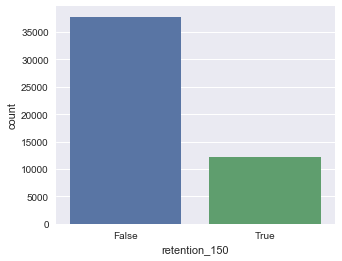

In [37]:
plt.figure(figsize=(5,4))
sns.countplot(df['retention_150'])
plt.show()

In [38]:
df_retention_150 = df[df['retention_150']]
df_retention_150.size

158574

In [39]:
print(df_retention_150.size/df.size)

0.24396


Only 24% are active in the 6th month.

From the above retention percent we see there are less number of examples. It is **imbalanced** data.

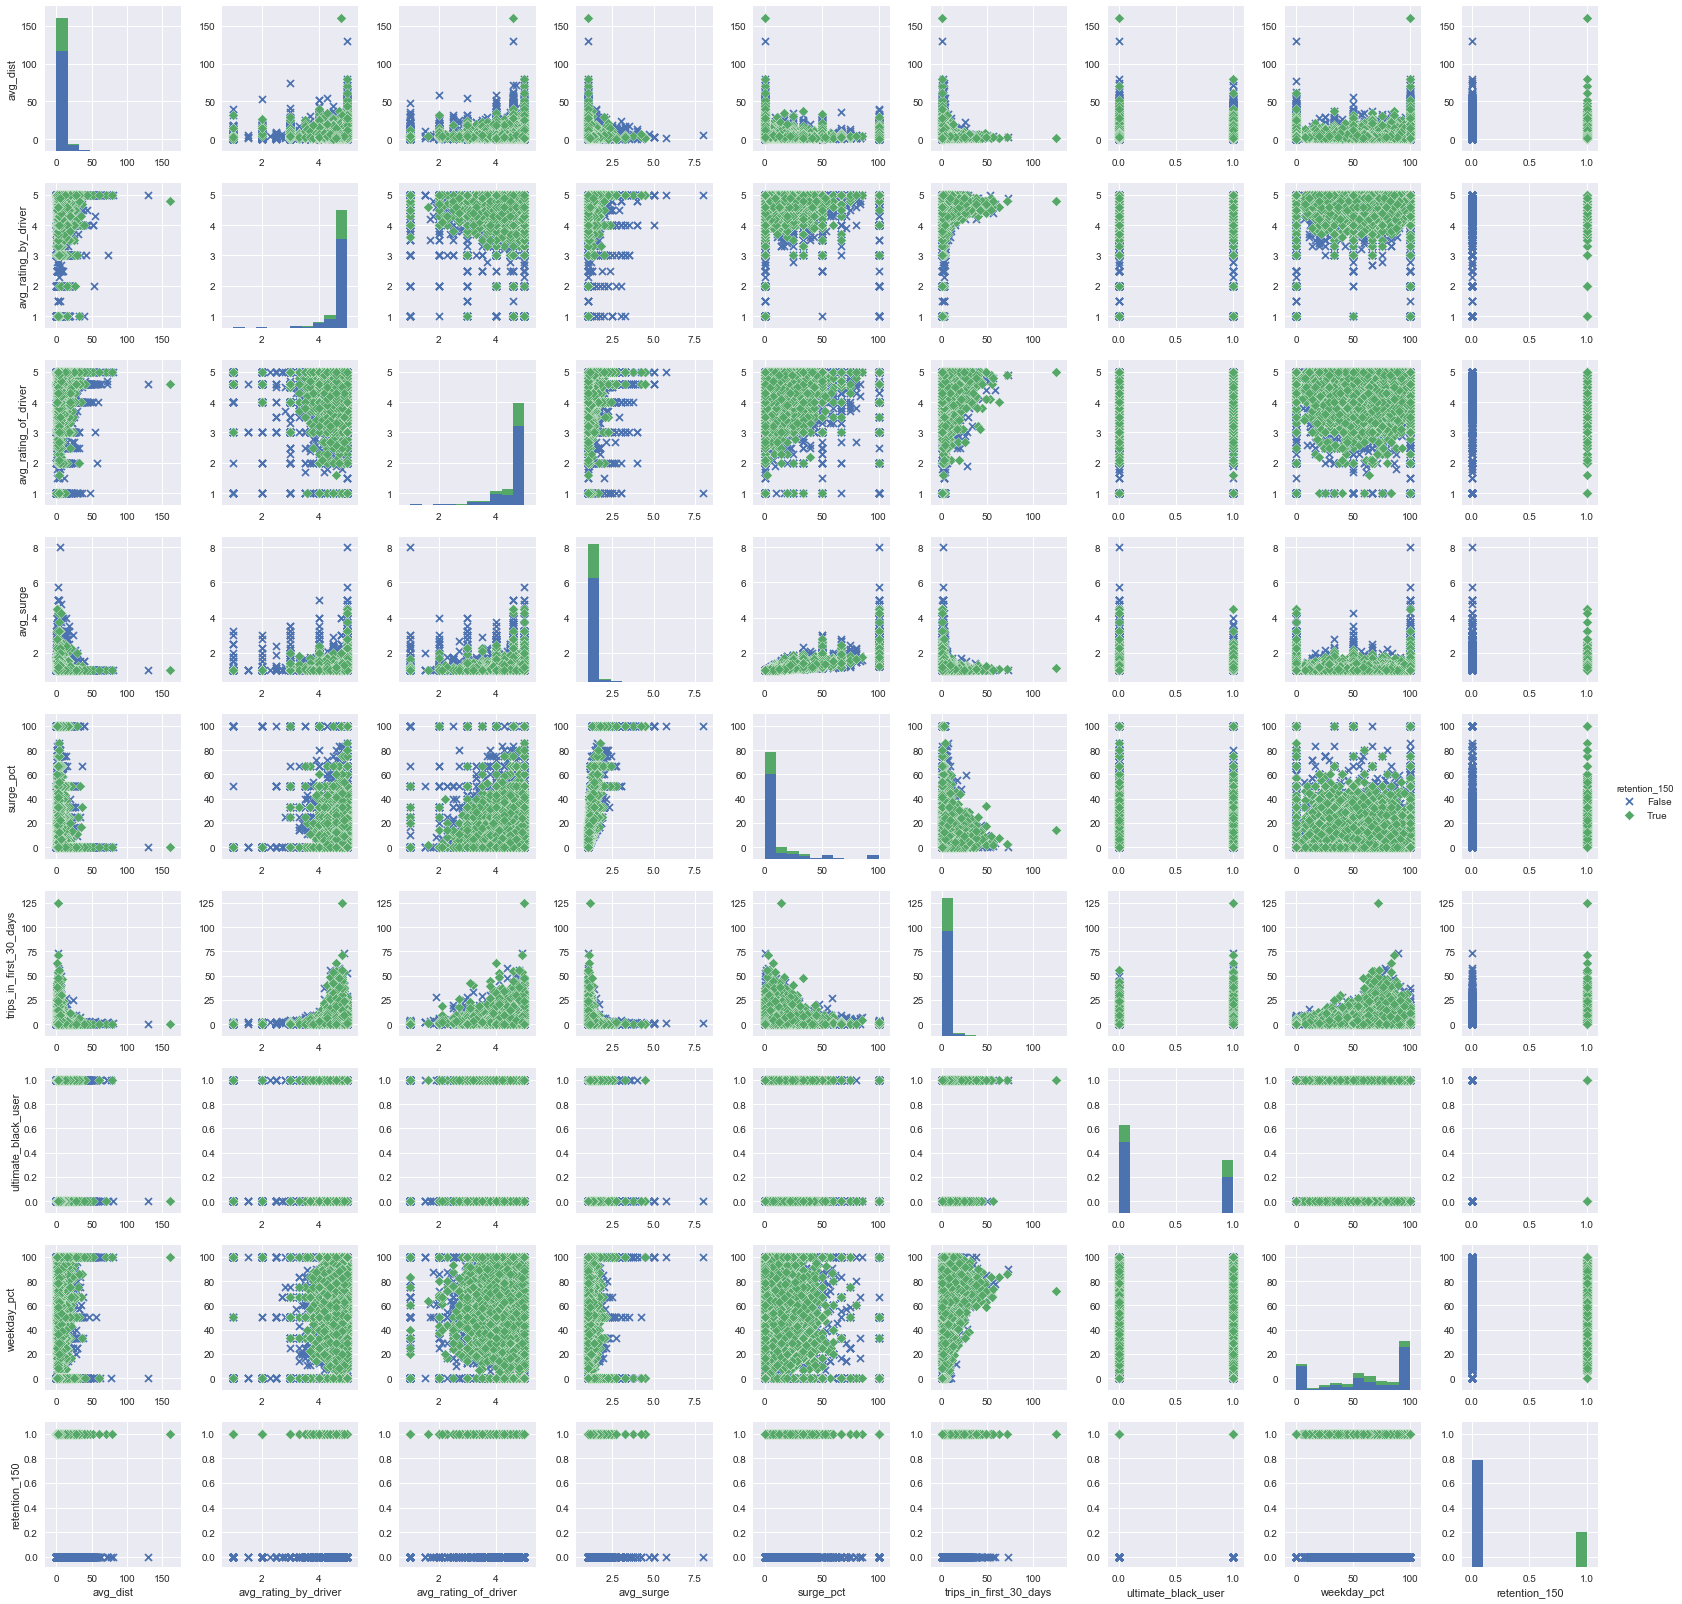

In [40]:
sns.pairplot(df, hue="retention_150", markers=["x", "D"])
plt.show()

# Build predictive models
## To determine if the user is active in their 6th month.

In [41]:
drop_columns = ['last_trip_date', 'signup_date']
df.drop(drop_columns, inplace=True, axis=1)

Dropping the date fields, which is not needed.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 4674 to 30220
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retention_150             50000 non-null bool
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 5.2+ MB


In [43]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

RANDOM_STATE = 42

Label encoding phone, since they are categorical and can be represented by encoding.

In [44]:
le_phone = LabelEncoder()
df['phone_encoded'] = le_phone.fit_transform(df.phone)
df.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
4674       4.03                   4.0              4.601559        1.0   
7672       3.39                   5.0              4.601559        1.0   
1431       9.76                   5.0              4.601559        1.0   
15387      5.03                   4.7              5.000000        1.0   
17482      3.28                   5.0              3.000000        1.5   

             city    phone  surge_pct  trips_in_first_30_days  \
4674      Astapor   iPhone        0.0                       2   
7672   Winterfell   iPhone        0.0                       1   
1431   Winterfell   iPhone        0.0                       0   
15387  Winterfell  Android        0.0                       2   
17482  Winterfell   iPhone      100.0                       0   

       ultimate_black_user  weekday_pct  retention_150  phone_encoded  
4674                 False          0.0           True              1  
7672                  True        100.0          False              1  
1431                  True         66.7           True              1  
15387                False         54.5           True              0  
17482                False          0.0          False              1

In [45]:
city_lb = LabelBinarizer()
city_fittrans = city_lb.fit_transform(df.city.values)

dfOneHot = pd.DataFrame(city_fittrans, columns = ["King's Landing",'Winterfell','Astapor'])
df = pd.concat([df, dfOneHot], axis=1)
df.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city    phone  surge_pct  trips_in_first_30_days  \
0  King's Landing   iPhone       15.4                       4   
1         Astapor  Android        0.0                       0   
2         Astapor   iPhone        0.0                       3   
3  King's Landing   iPhone       20.0                       9   
4      Winterfell  Android       11.8                      14   

   ultimate_black_user  weekday_pct  retention_150  phone_encoded  \
0                 True         46.2          False              1   
1                False         50.0          False              0   
2                False        100.0          False              1   
3                 True         80.0           True              1   
4                False         82.4          False              0   

   King's Landing  Winterfell  Astapor  
0               1           0        0  
1               0           0        1  
2               0           0        1  
3               0           0        1  
4               0           0        1

Similarly we did for the cities, using label binarizer we encoded them into their own categories.

In [46]:
df['ultimate_black_user'] = (df['ultimate_black_user'] == True).astype(int)
df['retention_150'] = (df['retention_150'] == True).astype(int)
df.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city    phone  surge_pct  trips_in_first_30_days  \
0  King's Landing   iPhone       15.4                       4   
1         Astapor  Android        0.0                       0   
2         Astapor   iPhone        0.0                       3   
3  King's Landing   iPhone       20.0                       9   
4      Winterfell  Android       11.8                      14   

   ultimate_black_user  weekday_pct  retention_150  phone_encoded  \
0                    1         46.2              0              1   
1                    0         50.0              0              0   
2                    0        100.0              0              1   
3                    1         80.0              1              1   
4                    0         82.4              0              0   

   King's Landing  Winterfell  Astapor  
0               1           0        0  
1               0           0        1  
2               0           0        1  
3               0           0        1  
4               0           0        1

In [47]:
df =df.drop(['city', 'phone'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int32
weekday_pct               50000 non-null float64
retention_150             50000 non-null int32
phone_encoded             50000 non-null int64
King's Landing            50000 non-null int32
Winterfell                50000 non-null int32
Astapor                   50000 non-null int32
dtypes: float64(6), int32(5), int64(2)
memory usage: 4.4 MB


In [48]:
features = df.drop('retention_150', axis=1)
target = df['retention_150']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30,random_state=RANDOM_STATE)

Splitting into features and target labels.

And splitting the data into train, test split.

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Using a LogisticRegression create a base model.

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_train)

In [51]:
def print_reports(pred, true, report='classification report'):
    print(60*'-')
    if (report == 'classification report'):
        print('CLASSIFICATION REPORT')
        print(classification_report(pred, true))
    elif (report == 'confusion matrix'):
        print('CONFUSION MATRIX')
        print(confusion_matrix(pred, true))
    else:
        print('ACCURACY SCORE')
        print(accuracy_score(pred, true))
    print(60*'-')

In [52]:
print_reports(y_train_pred, y_train,'classification report')
#print_reports(y_train_pred, y_train,'confusion matrix')
#print_reports(y_train_pred, y_train,'accuracy')

------------------------------------------------------------
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.98      0.77      0.86     33561
          1       0.11      0.63      0.18      1439

avg / total       0.94      0.77      0.84     35000

------------------------------------------------------------


In [53]:
y_pred = logreg.predict(X_test)

In [54]:
print_reports(y_pred, y_test,'classification report')
#print_reports(y_pred, y_test,'confusion matrix')
#print_reports(y_pred, y_test,'accuracy')

------------------------------------------------------------
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.98      0.77      0.86     14367
          1       0.11      0.62      0.18       633

avg / total       0.94      0.77      0.83     15000

------------------------------------------------------------


Model performance for class 1 is very poor. Looking at its metrics we need to tune hyper-parameters or choose different models.

In [55]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [56]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':Cs}
logreg = LogisticRegression()

gridSearchClf = GridSearchCV(logreg, parameters)
#classifier_scores(gridSearchClf, 'train', X_train, y_train)
gridSearchClf.fit(X_train, y_train)

c = gridSearchClf.best_params_['C']
print('C value:',c)
logreg_C = LogisticRegression(C = c)

C value: 1


In [57]:
logreg_C.fit(X_train, y_train)
y_pred = logreg_C.predict(X_test)

print_reports(y_pred, y_test,'classification report')
#print_reports(y_pred, y_test,'confusion matrix')
#print_reports(y_pred, y_test,'accuracy')

------------------------------------------------------------
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.98      0.77      0.86     14367
          1       0.11      0.62      0.18       633

avg / total       0.94      0.77      0.83     15000

------------------------------------------------------------


After GridSearchCV, still low metrics.

In [58]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, random_state=RANDOM_STATE)

logregmodelCV = LogisticRegression(C=c)
logregmodelCV.fit(X_train, y_train)
scorelogregCV = cross_val_score(logregmodelCV, X_train, y_train, cv=kfold)
testscorelogregCV = cross_val_score(logregmodelCV, X_test, y_test, cv=kfold)

print('10-fold cross validation average accuracy on train set is {:.5f}'.format(scorelogregCV.mean()))
print('10-fold cross validation average accuracy on test set is {:.5f}'.format(testscorelogregCV.mean()))

10-fold cross validation average accuracy on train set is 0.76683
10-fold cross validation average accuracy on test set is 0.76513


In [59]:
logreg_C_l1 = LogisticRegression(penalty='l1', C=c)
logreg_C_l1.fit(X_train, y_train)
y_pred = logreg_C_l1.predict(X_test)

print_reports(y_pred, y_test,'classification report')
#print_reports(y_pred, y_test,'confusion matrix')
#print_reports(y_pred, y_test,'accuracy')

------------------------------------------------------------
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.98      0.77      0.86     14366
          1       0.11      0.62      0.18       634

avg / total       0.94      0.77      0.83     15000

------------------------------------------------------------


Applying L1 penalty did not improve much.

Metrics are really low (precision, recall) and this model might not perform as expected.

We will choose RandomForestClassifier and check how it performs.

In [60]:
# Perform RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

randomforest_clf = RandomForestClassifier(random_state=RANDOM_STATE)

randomforest_clf.fit(X_train, y_train)

y_train_pred = randomforest_clf.predict(X_train)

print_reports(y_train_pred, y_train,'classification report')
#print_reports(y_train_pred, y_train,'confusion matrix')
print_reports(y_train_pred, y_train,'accuracy')

y_pred = randomforest_clf.predict(X_test)

print_reports(y_pred, y_test,'classification report')
#print_reports(y_pred, y_test,'confusion matrix')
print_reports(y_pred, y_test,'accuracy')

------------------------------------------------------------
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     27067
          1       0.92      0.99      0.95      7933

avg / total       0.98      0.98      0.98     35000

------------------------------------------------------------
------------------------------------------------------------
ACCURACY SCORE
0.978
------------------------------------------------------------
------------------------------------------------------------
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.89      0.81      0.85     12544
          1       0.34      0.51      0.41      2456

avg / total       0.80      0.76      0.78     15000

------------------------------------------------------------
------------------------------------------------------------
ACCURACY SCORE
0.7592666666666666
--------------------------------------------

Metrics did improve w.r.t logistic regression.

But, clearly the model over-fitted. <br>
Difference in Train and Test validation scores are high.

We need to tune the hyper-parameters for the RandomForestClassifier.

We can use RandomizedSearchCV to find out best paramters which can improve the performance of the model.

In [61]:
from sklearn.model_selection import RandomizedSearchCV

def randomForestRandomizedSearchCV() :

    clf = RandomForestClassifier(random_state=RANDOM_STATE)
    
    criterion = ['gini', 'entropy']

    n_estimators = [int(x) for x in np.linspace(10, 200, num = 200)]

    max_features = ['auto', 'sqrt', 'log2', None]

    max_depth = [int(x) for x in np.linspace(10, 100, num = 100)]
    max_depth.append(None)

    min_samples_split = [2, 5, 10]

    min_samples_leaf = [1, 2, 4]

    bootstrap = [True, False]

    warm_start= [True, False]
    
    class_weight = ['balanced_subsample','balanced']

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'criterion': criterion,
                   'class_weight': class_weight,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap,
                   'warm_start': warm_start}
    #print(random_grid)

    # Use the random grid to search for best hyperparameters
    random_search_cv_ = RandomizedSearchCV(estimator = clf,
                                           param_distributions = random_grid,
                                           n_iter = 10,
                                           cv = 5,
                                           verbose=10,
                                           random_state=RANDOM_STATE,
                                           n_jobs = -1)
    return random_search_cv_

In [63]:
oscv = randomForestRandomizedSearchCV()

oscv.fit(X_train, y_train)

y_train_pred = oscv.predict(X_train)

print(oscv.best_params_)

print_reports(y_train_pred, y_train,'classification report')
#print_reports(y_train_pred, y_train,'confusion matrix')
print_reports(y_train_pred, y_train,'accuracy')

y_pred = oscv.predict(X_test)

print_reports(y_pred, y_test,'classification report')
#print_reports(y_pred, y_test,'confusion matrix')
print_reports(y_pred, y_test,'accuracy')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  1.0min remaining:   13.5s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  1.1min remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


{'warm_start': False, 'n_estimators': 43, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 16, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
------------------------------------------------------------
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.89      0.95      0.92     24610
          1       0.86      0.71      0.78     10390

avg / total       0.88      0.88      0.88     35000

------------------------------------------------------------
------------------------------------------------------------
ACCURACY SCORE
0.8794
------------------------------------------------------------
------------------------------------------------------------
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.82      0.86      0.84     10842
          1       0.58      0.52      0.55      4158

avg / total       0.76      0.76      0.76     15000

The difference in Train and Test validation scores are not huge, and the metrics for class 1 did improve.<br>
Plus metrics in general for both train and test are good.

This model can be ideal for prediction.

Alternatively we can use Oversampling techniques to maximize the minority class and train the model.

In [65]:
from imblearn.over_sampling import SMOTE # (Synthetic Minority Oversampling Technique)

oversampler=SMOTE(random_state=RANDOM_STATE)
os_features, os_labels = oversampler.fit_sample(X_train,y_train)

oscv = randomForestRandomizedSearchCV()

oscv.fit(os_features, os_labels)

y_train_pred = oscv.predict(os_features)

print(oscv.best_params_)

print_reports(y_train_pred, os_labels,'classification report')
#print_reports(y_train_pred, os_labels,'confusion matrix')
print_reports(y_train_pred, os_labels,'accuracy')

y_pred = oscv.predict(X_test)

print_reports(y_pred, y_test,'classification report')
#print_reports(y_pred, y_test,'confusion matrix')
print_reports(y_pred, y_test,'accuracy')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  1.7min remaining:   22.3s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  1.8min remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished


{'warm_start': False, 'n_estimators': 81, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 95, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': False}
------------------------------------------------------------
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     27235
          1       0.97      1.00      0.98     25703

avg / total       0.98      0.98      0.98     52938

------------------------------------------------------------
------------------------------------------------------------
ACCURACY SCORE
0.9818277985568022
------------------------------------------------------------
------------------------------------------------------------
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.86      0.83      0.84     11814
          1       0.44      0.51      0.47      3186

avg / total       0.77      0.76      0.77

Definitely we can see there was over-fitting.

I choose the random forest model which was not trained on oversampling techique.<br>
It has optimal prediction.

In [66]:
rf = RandomForestClassifier(warm_start= False,
                            n_estimators= 43,
                            min_samples_split= 2,
                            min_samples_leaf= 2,
                            max_features= 'log2',
                            max_depth= 16,
                            criterion= 'entropy',
                            class_weight= 'balanced',
                            bootstrap= True)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=16, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=43, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [67]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
indices

array([ 0,  7,  1,  4,  5,  2,  3,  8,  6, 11,  9, 10], dtype=int64)

In [68]:
feature_imp_dict = {}
for f in range(X_train.shape[1]):
    feature_imp_dict[X_train.columns.get_values()[indices[f]]]= importances[indices[f]]*100

In [69]:
feature_imp_df = pd.DataFrame(list(feature_imp_dict.items()), columns=['Feature','Feature contribution'])
print(feature_imp_df)

                   Feature  Feature contribution
0                 avg_dist             23.813527
1              weekday_pct             14.863914
2     avg_rating_by_driver             14.104533
3                surge_pct             10.175338
4   trips_in_first_30_days              9.361989
5     avg_rating_of_driver              8.533545
6                avg_surge              7.803287
7            phone_encoded              4.662452
8      ultimate_black_user              3.196102
9                  Astapor              1.227965
10          King's Landing              1.214764
11              Winterfell              1.042583


The above list shows each feature contribution.

Main contributing features were
1. avg_dist
2. weekday_pct
4. avg_rating_by_driver
4. surge_pct

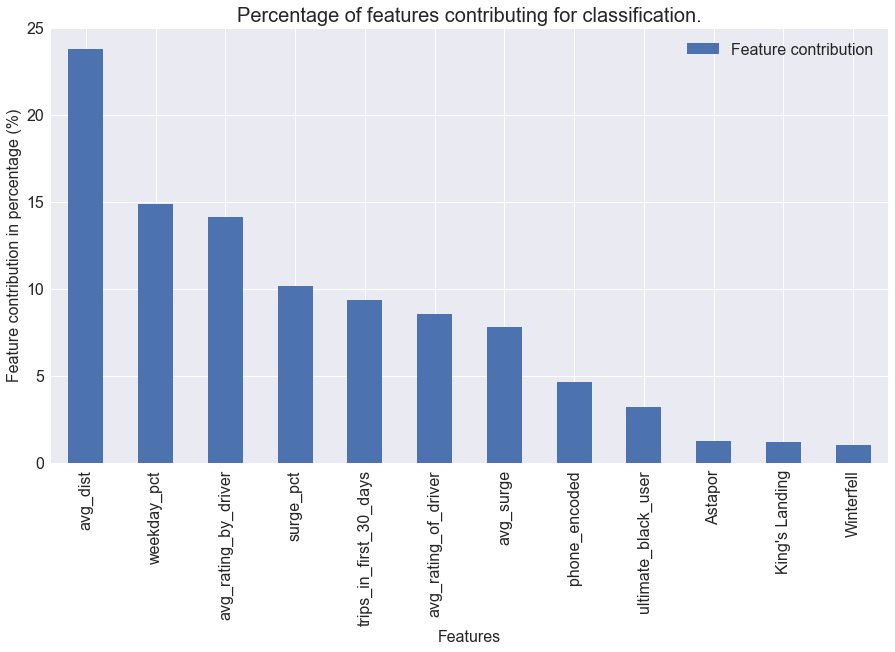

In [70]:
feature_imp_df.plot(kind='bar',x='Feature', figsize=(15, 8), fontsize=16)
plt.ylabel('Feature contribution in percentage (%)', fontsize=16)
plt.xlabel('Features',fontsize=16)
plt.legend(fontsize=16)
plt.title('Percentage of features contributing for classification.',fontsize=20)
plt.show()

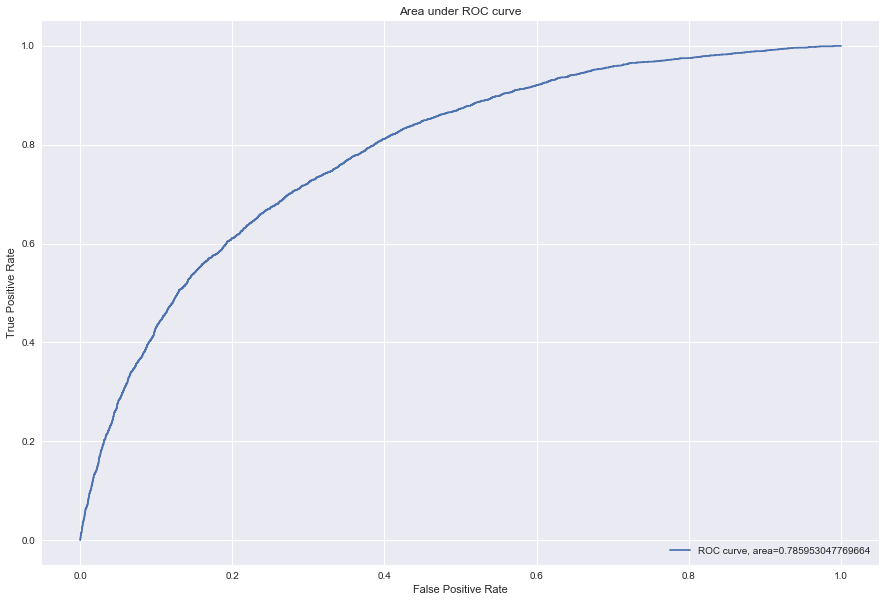

In [71]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC curve, area="+str(auc))
plt.title('Area under ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

We have a good ROC curve ~80%.

From the features we can observe avg_dist, weekday_pct, avg_rating_by_driver,surge_pct are affecting the most for rider retention (active during 6th month).

Ultimate can look into the above features and understand what is making the user retention.

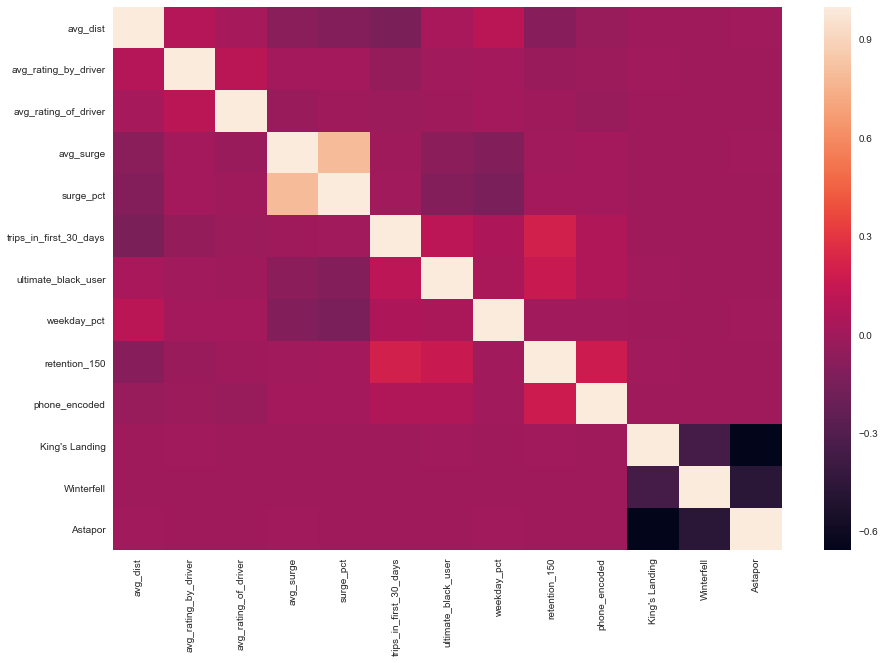

In [72]:
sns.heatmap(df.corr())
plt.show()

Additionally looking at the heatmap, we see phone, trips_in_first_30_days, ultimate_black_user, avg_dist have a postive correlation.